<a href="https://colab.research.google.com/github/rk639-hue/ORIE4580/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 5

#### Students: Darcy del Real (dld226) and Rishi Kumar (rk639)

### Github link: [example Github link] (https://github.com/rk639-hue/ORIE4580/blob/58fcd2319293176e17cf97340fbbb81373fc26e5/HW5.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

<hr>

## Ans.
Let the total population of red-tailed hawks be $N$, where 10 birds are radio-tagged.  
Each bird visits the feeder according to an independent Poisson process with rate $\lambda$ (visits per week).  

---

### Observed Averages
- Average total visits per week: $\overline{T} = 28.8$  
- Average tagged visits per week: $\overline{T}_{\text{tag}} = 6$

---

### Theoretical Expectations
$$
E[\text{tagged visits per week}] = 10\lambda
$$
$$
E[\text{total visits per week}] = N\lambda
$$

---

### Method of Moments Estimation
From the tagged data:
$$
10\lambda = 6 \;\Rightarrow\; \hat{\lambda} = \frac{6}{10} = 0.6
$$

From the total data:
$$
N\lambda = 28.8 \;\Rightarrow\; \hat{N} = \frac{28.8}{0.6} = 48
$$

---

### Final Estimate
$$
\boxed{\hat{N} = 48}
$$



<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.



MLE for total population (N): 49


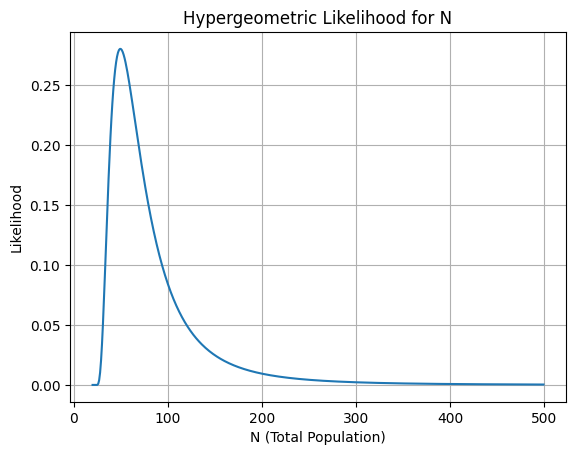

In [ ]:
import numpy as np
from math import comb


tagged = 10        # number of total tagged birds
observed = 20      # number of unique birds observed
tagged_observed = 4  # number of tagged birds observed

# Define the likelihood function for N
def likelihood(N, tagged=tagged, observed=observed, tagged_observed=tagged_observed):
    if N < max(tagged, observed):
        return 0
    return comb(tagged, tagged_observed) * comb(N - tagged, observed - tagged_observed) / comb(N, observed)

# Search for N that maximizes likelihood
N_values = np.arange(observed, 500)  # search range
L_values = [likelihood(N) for N in N_values]

# Find MLE
N_hat = N_values[np.argmax(L_values)]

print(f"MLE for total population (N): {N_hat}")

# Optionally, plot likelihood curve
import matplotlib.pyplot as plt
plt.plot(N_values, L_values)
plt.xlabel("N (Total Population)")
plt.ylabel("Likelihood")
plt.title("Hypergeometric Likelihood for N")
plt.grid(True)
plt.show()


<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.
The total demand $N$ is a geometric random variable with parameter $p$, with pmf:

$$
P(N = k) = (1-p)^k p, \quad k \ge 0
$$

Sales $Y$ are censored at 40:

$$
Y = \min(N, 40)
$$

So the probability mass function of $Y$ is:

$$
P(Y = y) =
\begin{cases}
(1-p)^y p, & y = 0, 1, 2, \dots, 39 \\
(1-p)^{40}, & y = 40
\end{cases}
$$

**Verification that the pmf sums to 1:**

$$
\sum_{y=0}^{39} P(Y = y) + P(Y = 40) = \sum_{y=0}^{39} (1-p)^y p + (1-p)^{40}
$$

The finite geometric series:

$$
\sum_{y=0}^{39} (1-p)^y p = p \cdot \frac{1 - (1-p)^{40}}{1 - (1-p)} = 1 - (1-p)^{40}
$$

Adding $(1-p)^{40}$ gives:

$$
[1 - (1-p)^{40}] + (1-p)^{40} = 1
$$

The pmf is valid.


<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Soup_sales_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Day     100 non-null    int64
 1   Y       100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize



y = df['Y'].values.astype(int)
n_days = len(y)
n_cens = (y == 40).sum()

print(f"Loaded {n_days} days, {n_cens} censored at 40")
print(f"Raw mean sales = {y.mean():.2f}")


def negloglik(p_vec):
    p = p_vec[0]
    if p <= 0 or p >= 1:
        return 1e20
    q = 1 - p
    ll = 0.0
    for yi in y:
        if yi < 40:                          # uncensored observation
            ll += np.log(p) + yi * np.log(q)
        else:                                # censored: P(N ≥ 40) = q^{40}
            ll += 40 * np.log(q)
    return -ll

res = minimize(negloglik, x0=[0.04],
               method='L-BFGS-B',
               bounds=[(1e-8, 0.999)])

p_hat = res.x[0]
q_hat = 1 - p_hat
mean_demand = q_hat / p_hat

print(f"\n=== MLE ===")
print(f"p̂ = {p_hat:.6f}")
print(f"Estimated E[N] = (1-p)/p = {mean_demand:.2f} bowls")


uncens = y[y < 40]
S1 = uncens.sum()                       # sum of uncensored y_i
I_obs = (S1 + 40*n_cens) / p_hat**2 + n_cens / q_hat
se = np.sqrt(1 / I_obs)

ci_low  = p_hat - 1.96*se
ci_high = p_hat + 1.96*se
print(f"SE(p̂) = {se:.6f}")
print(f"95% CI = ({ci_low:.6f}, {ci_high:.6f})")




Loaded 100 days, 34 censored at 40
Raw mean sales = 23.97

=== MLE ===
p̂ = 0.026797
Estimated E[N] = (1-p)/p = 36.32 bowls
SE(p̂) = 0.000547
95% CI = (0.025724, 0.027869)


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

probability of at least one shared birthday

Assume birthdays are uniformly distributed over 365 days and independent.  
For a group of $n$ people, the probability that **no two** share a birthday is
$$
P(\text{no match})=\prod_{k=0}^{n-1}\frac{365-k}{365}.
$$
Therefore the probability that **at least two** people share a birthday is
$$
P(\text{at least one match})=1-\prod_{k=0}^{n-1}\frac{365-k}{365}.
$$

Below we compute and plot $P(\text{at least one match})$ for $n\in\{10,11,\dots,49,50\}$.



MATHEMATICAL FORMULA

P(at least 2 share birthday) = 1 - P(all different birthdays)

                                     n-1
                              = 1 - ∏ (1 - i/365)
                                    i=0

                              = 1 - [365/365 × 364/365 × 363/365 × ... × (365-n+1)/365]

                              = 1 - 365!/(365^n × (365-n)!)
BIRTHDAY PARADOX - PROBABILITY ANALYSIS

Probability that at least 2 people share a birthday:

n (people)   Probability     Percentage     
------------------------------------------
10           0.116948        11.69         %
15           0.252901        25.29         %
20           0.411438        41.14         %
25           0.568700        56.87         %
30           0.706316        70.63         %
35           0.814383        81.44         %
40           0.891232        89.12         %
45           0.940976        94.10         %
50           0.970374        97.04         %

Probability first exceeds 50% at n = 23 peop

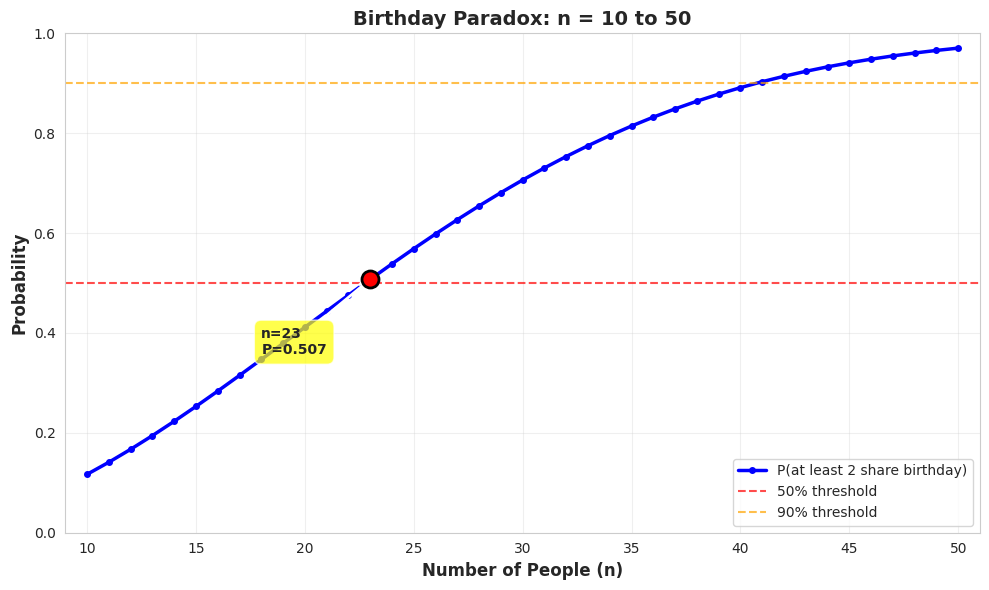

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mathematical formula display
print("\n" + "=" * 70)
print("MATHEMATICAL FORMULA")
print("=" * 70)
print("\nP(at least 2 share birthday) = 1 - P(all different birthdays)")
print("\n                                     n-1")
print("                              = 1 - ∏ (1 - i/365)")
print("                                    i=0")
print("\n                              = 1 - [365/365 × 364/365 × 363/365 × ... × (365-n+1)/365]")
print("\n                              = 1 - 365!/(365^n × (365-n)!)")
print("=" * 70)


# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

def birthday_probability(n, days=365):
    """
    Calculate the probability that at least 2 people share a birthday
    in a group of n people.

    Parameters:
    n: number of people
    days: number of days in year (default 365)

    Returns:
    probability that at least 2 people share a birthday
    """
    if n > days:
        return 1.0

    # Calculate probability that all have different birthdays
    prob_all_different = 1.0
    for i in range(n):
        prob_all_different *= (days - i) / days

    # Probability that at least 2 share is the complement
    return 1 - prob_all_different

def birthday_probability_log(n, days=365):
    """
    Calculate using log to avoid numerical issues for large n.
    """
    if n > days:
        return 1.0

    # Calculate log probability that all have different birthdays
    log_prob_all_different = 0.0
    for i in range(n):
        log_prob_all_different += np.log((days - i) / days)

    # Convert back from log
    prob_all_different = np.exp(log_prob_all_different)

    return 1 - prob_all_different

# Calculate probabilities for n from 10 to 50
n_values = np.arange(10, 51)
probabilities = [birthday_probability(n) for n in n_values]

# Print some notable values
print("=" * 70)
print("BIRTHDAY PARADOX - PROBABILITY ANALYSIS")
print("=" * 70)
print("\nProbability that at least 2 people share a birthday:\n")
print(f"{'n (people)':<12} {'Probability':<15} {'Percentage':<15}")
print("-" * 42)

for n in range(10, 51, 5):
    prob = birthday_probability(n)
    print(f"{n:<12} {prob:<15.6f} {prob*100:<14.2f}%")

# Find when probability exceeds 50%
for n in range(1, 366):
    prob = birthday_probability(n)
    if prob > 0.5:
        print(f"\nProbability first exceeds 50% at n = {n} people (P = {prob:.4f})")
        break

# Find when probability exceeds 90%
for n in range(1, 366):
    prob = birthday_probability(n)
    if prob > 0.9:
        print(f"Probability first exceeds 90% at n = {n} people (P = {prob:.4f})")
        break

# Find when probability exceeds 99%
for n in range(1, 366):
    prob = birthday_probability(n)
    if prob > 0.99:
        print(f"Probability first exceeds 99% at n = {n} people (P = {prob:.4f})")
        break

# Create visualization
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 1: Main probability curve (n = 10 to 50)
ax1.plot(n_values, probabilities, 'b-', linewidth=2.5, marker='o',
         markersize=4, label='P(at least 2 share birthday)')
ax1.axhline(y=0.5, color='r', linestyle='--', linewidth=1.5, alpha=0.7, label='50% threshold')
ax1.axhline(y=0.9, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='90% threshold')
ax1.set_xlabel('Number of People (n)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax1.set_title('Birthday Paradox: n = 10 to 50', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)
ax1.set_xlim(9, 51)
ax1.set_ylim(0, 1)

# Highlight key points
n_50_percent = 23
prob_50 = birthday_probability(n_50_percent)
ax1.scatter([n_50_percent], [prob_50], color='red', s=150, zorder=5,
            edgecolors='black', linewidth=2)
ax1.annotate(f'n={n_50_percent}\nP={prob_50:.3f}',
             xy=(n_50_percent, prob_50), xytext=(n_50_percent-5, prob_50-0.15),
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', lw=2))

plt.tight_layout()
plt.savefig('birthday_paradox.png', dpi=300, bbox_inches='tight')
print("\n" + "=" * 70)
print("Plot saved as 'birthday_paradox.png'")
plt.show()


<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

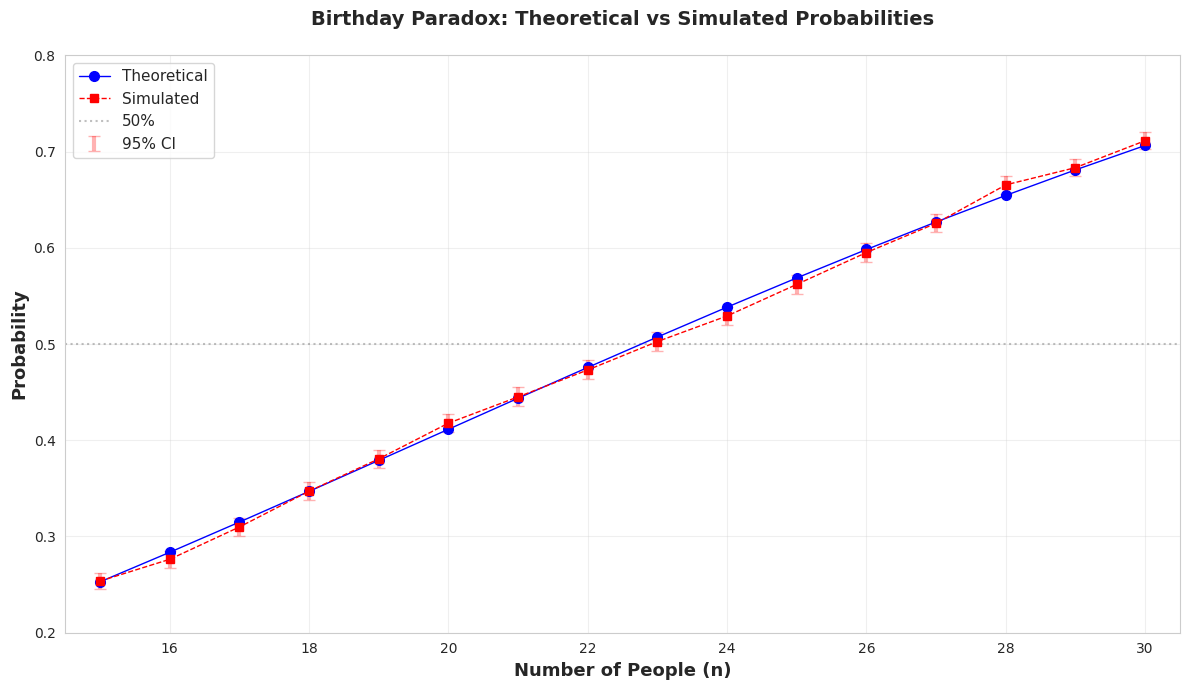

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

def birthday_probability_theoretical(n, days=365):
    """
    Calculate the theoretical probability that at least 2 people share a birthday.
    """
    if n > days:
        return 1.0

    # Calculate probability that all have different birthdays
    prob_all_different = 1.0
    for i in range(n):
        prob_all_different *= (days - i) / days

    return 1 - prob_all_different

def simulate_birthday_once(n, days=365):
    """
    Simulate one instance of n people with random birthdays.
    Returns True if at least 2 people share a birthday, False otherwise.
    """
    birthdays = np.random.randint(0, days, size=n)
    # Check if there are duplicates
    return len(birthdays) != len(np.unique(birthdays))

def simulate_birthday_probability(n, num_simulations, days=365):
    """
    Simulate the birthday problem num_simulations times.
    Returns the estimated probability and 95% confidence interval.
    """
    successes = 0
    for _ in range(num_simulations):
        if simulate_birthday_once(n, days):
            successes += 1

    p_hat = successes / num_simulations

    # Calculate 95% confidence interval using normal approximation
    se = np.sqrt(p_hat * (1 - p_hat) / num_simulations)
    z_score = 1.96  # For 95% confidence

    ci_lower = p_hat - z_score * se
    ci_upper = p_hat + z_score * se

    # Ensure CI is within [0, 1]
    ci_lower = max(0, ci_lower)
    ci_upper = min(1, ci_upper)

    return p_hat, ci_lower, ci_upper

# Set random seed for reproducibility
np.random.seed(42)

# Number of simulations (10000 ensures ~0.01 margin of error)
num_simulations = 10000

# Range of n values
n_values = np.arange(15, 31)

# Storage for results
theoretical_probs = []
simulated_probs = []
ci_lower_list = []
ci_upper_list = []

for n in n_values:
    # Calculate theoretical probability
    p_theoretical = birthday_probability_theoretical(n)
    theoretical_probs.append(p_theoretical)

    # Run simulation
    p_simulated, ci_lower, ci_upper = simulate_birthday_probability(n, num_simulations)
    simulated_probs.append(p_simulated)
    ci_lower_list.append(ci_lower)
    ci_upper_list.append(ci_upper)


# Convert to numpy arrays
theoretical_probs = np.array(theoretical_probs)
simulated_probs = np.array(simulated_probs)
ci_lower_list = np.array(ci_lower_list)
ci_upper_list = np.array(ci_upper_list)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))

# Plot theoretical probabilities
ax.plot(n_values, theoretical_probs, 'b-', linewidth=1, label='Theoretical',
        marker='o', markersize=7, zorder=3)

# Plot simulated probabilities
ax.plot(n_values, simulated_probs, 'r--', linewidth=1, label='Simulated',
        marker='s', markersize=6, zorder=3)

# Add 95% confidence intervals as error bars
ax.errorbar(n_values, simulated_probs,
            yerr=[simulated_probs - ci_lower_list, ci_upper_list - simulated_probs],
            fmt='none', ecolor='red', alpha=0.3, linewidth=3, capsize=4,
            label='95% CI', zorder=2)

# Add horizontal line at 50%
ax.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5, label='50%')

ax.set_xlabel('Number of People (n)', fontsize=13, fontweight='bold')
ax.set_ylabel('Probability', fontsize=13, fontweight='bold')
ax.set_title('Birthday Paradox: Theoretical vs Simulated Probabilities\n',
              fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='upper left')
ax.set_xlim(14.5, 30.5)
ax.set_ylim(0.2, 0.8)

plt.tight_layout()
plt.show()

<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

Loaded 365 days. Total births = 480,715. Mean per day = 1317.03


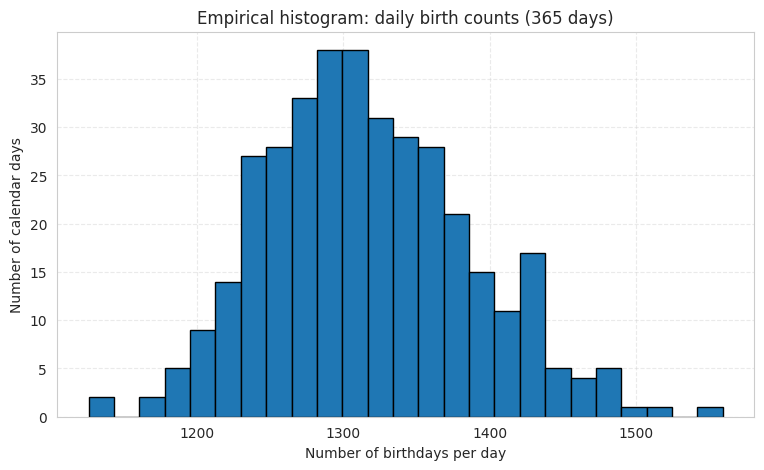

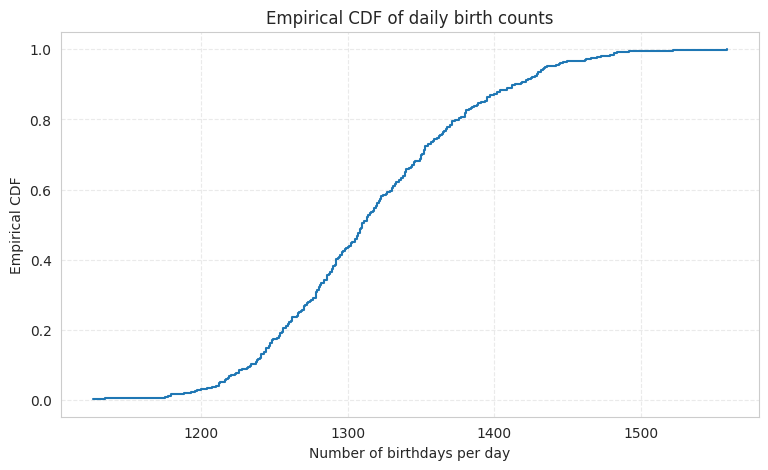

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

# -------------------------
# Load file (format: header, lines "MMDD  count")
# -------------------------
# Use genfromtxt to handle header; read date strings and counts
raw = np.genfromtxt('bdaydata.txt', dtype=str, skip_header=1)
# raw is shape (365, 2) with columns [date_str, count_str]
date_strs = raw[:, 0]
counts = raw[:, 1].astype(int)


# Convert MMDD strings to day-of-year indices (1..365)
day_of_year = []
for s in date_strs:
    # parse "MMDD" using a non-leap year (year doesn't matter)
    dt = datetime.strptime(s, "%m%d")
    day_of_year.append(dt.timetuple().tm_yday)
day_of_year = np.array(day_of_year, dtype=int)


print(f"Loaded {len(counts)} days. Total births = {counts.sum():,}. Mean per day = {counts.mean():.2f}")

# -------------------------
# (i) Empirical histogram of the counts (counts per day)
# -------------------------
plt.figure(figsize=(9,5))
plt.hist(counts, bins=25, edgecolor='black')
plt.xlabel('Number of birthdays per day')
plt.ylabel('Number of calendar days')
plt.title('Empirical histogram: daily birth counts (365 days)')
plt.grid(alpha=0.4, linestyle='--')
plt.show()

# -------------------------
# (ii) Empirical CDF of the counts
# -------------------------
sorted_counts = np.sort(counts)
cdf_vals = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)

plt.figure(figsize=(9,5))
plt.step(sorted_counts, cdf_vals, where='post')
plt.xlabel('Number of birthdays per day')
plt.ylabel('Empirical CDF')
plt.title('Empirical CDF of daily birth counts')
plt.grid(alpha=0.4, linestyle='--')
plt.show()





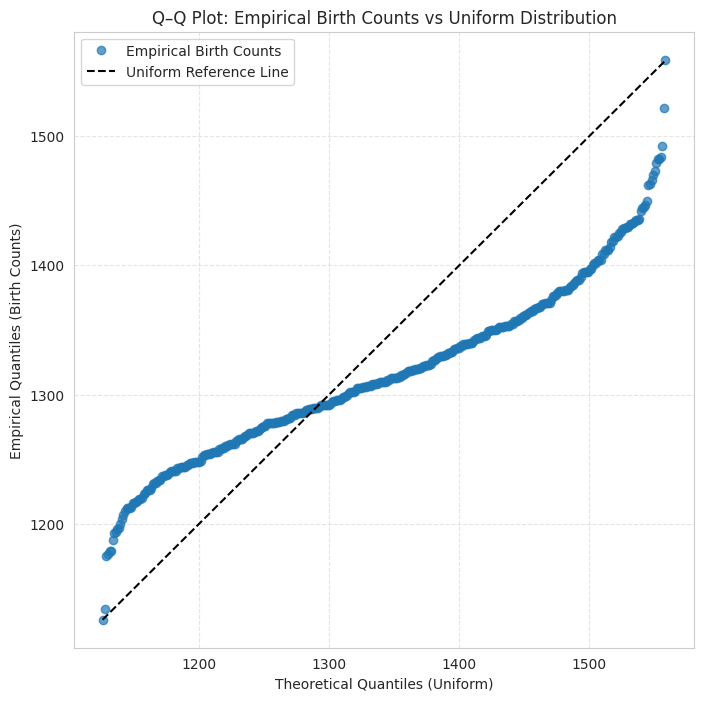

In [ ]:
## Q-Q plot

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

sorted_counts = np.sort(counts)
n = len(counts)
prob_levels = (np.arange(1, n + 1) - 0.5) / n

# Theoretical quantiles from Uniform(min, max)
uniform_theoretical = stats.uniform.ppf(prob_levels, loc=np.min(counts), scale=np.max(counts) - np.min(counts))

# -------------------------------------------------
# Plot empirical vs uniform quantiles
# -------------------------------------------------
plt.figure(figsize=(8, 8))
plt.plot(uniform_theoretical, sorted_counts, 'o', label='Empirical Birth Counts', alpha=0.7)
plt.plot([min(counts), max(counts)], [min(counts), max(counts)], 'k--', label='Uniform Reference Line')

plt.xlabel('Theoretical Quantiles (Uniform)')
plt.ylabel('Empirical Quantiles (Birth Counts)')
plt.title('Q–Q Plot: Empirical Birth Counts vs Uniform Distribution')
plt.legend()
plt.grid(alpha=0.5, linestyle='--')
plt.show()



## Ans.

<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


In [ ]:
## Chi-square test

n_days = len(counts)
total_births = np.sum(counts)
expected = np.full(n_days, total_births / n_days)  # Expected uniform counts

chi2_stat, chi2_pval = stats.chisquare(f_obs=counts, f_exp=expected)

print("=== Chi-square Goodness-of-Fit Test ===")
print(f"Chi-square statistic = {chi2_stat:.2f}")
print(f"Degrees of freedom   = {n_days - 1}")
print(f"p-value              = {chi2_pval:.4e}")
if chi2_pval < 0.05:
    print("→ Reject H₀: Birth counts are NOT uniformly distributed.\n")
else:
    print("→ Fail to reject H₀: Birth counts are consistent with a uniform distribution.\n")



=== Chi-square Goodness-of-Fit Test ===
Chi-square statistic = 1352.72
Degrees of freedom   = 364
p-value              = 1.2489e-113
→ Reject H₀: Birth counts are NOT uniformly distributed.



In [ ]:
## K-S test
# -------------------------------------------------
# 2. Kolmogorov–Smirnov test
# -------------------------------------------------
# Normalize data to [0,1] range for KS test against uniform
scaled_counts = (counts - np.min(counts)) / (np.max(counts) - np.min(counts))

ks_stat, ks_pval = stats.kstest(scaled_counts, 'uniform')

print("=== Kolmogorov–Smirnov Test ===")
print(f"KS statistic = {ks_stat:.4f}")
print(f"p-value      = {ks_pval:.4e}")
if ks_pval < 0.05:
    print("→ Reject H₀: Birth counts do NOT follow a uniform distribution.")
else:
    print("→ Fail to reject H₀: Birth counts are consistent with a uniform distribution.")

=== Kolmogorov–Smirnov Test ===
KS statistic = 0.2429
p-value      = 1.9180e-19
→ Reject H₀: Birth counts do NOT follow a uniform distribution.


<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


BIRTHDAY PARADOX - NONPARAMETRIC BOOTSTRAP WITH EMPIRICAL DATA

Data Summary:
  Number of days: 365
  Total births: 480715
  Mean births per day: 1317.03

Empirical probability range: [0.002342, 0.003243]
Uniform probability would be: 0.002740

Bootstrap parameters:
  Number of bootstrap iterations: 1000
  Simulations per bootstrap: 1000

Running bootstrap for n in {15, 16, ..., 30}...
This may take a few minutes...


Bootstrap complete!

Plot saved as 'birthday_bootstrap_comparison.png'


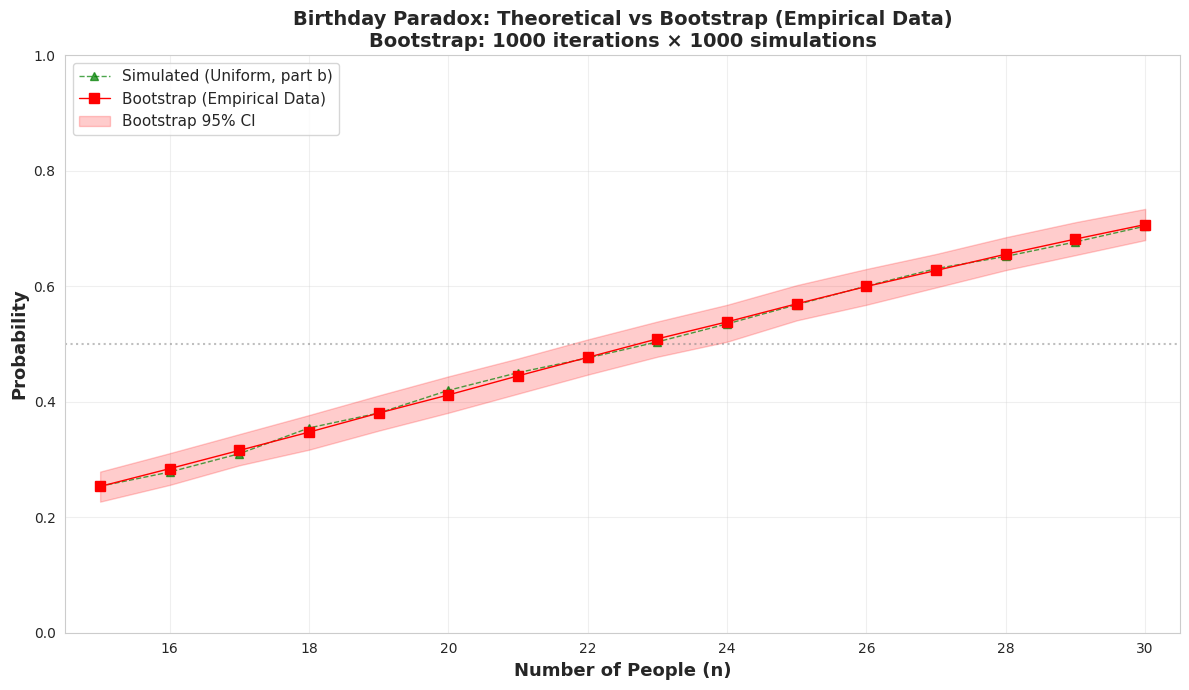


COMPARISON: UNIFORM vs EMPIRICAL DISTRIBUTION

n     Theoretical  Uniform Sim  Bootstrap    Difference  
--------------------------------------------------------------------------------
15    0.2529       0.2537       0.2533       +0.0004
16    0.2836       0.2783       0.2842       +0.0006
17    0.3150       0.3101       0.3158       +0.0008
18    0.3469       0.3547       0.3474       +0.0005
19    0.3791       0.3805       0.3805       +0.0013
20    0.4114       0.4198       0.4119       +0.0004
21    0.4437       0.4505       0.4449       +0.0012
22    0.4757       0.4758       0.4769       +0.0012
23    0.5073       0.5037       0.5090       +0.0017
24    0.5383       0.5349       0.5384       +0.0001
25    0.5687       0.5682       0.5697       +0.0010
26    0.5982       0.6004       0.5997       +0.0015
27    0.6269       0.6306       0.6274       +0.0006
28    0.6545       0.6518       0.6556       +0.0011
29    0.6810       0.6768       0.6818       +0.0008
30    0.7063      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

def birthday_probability_theoretical(n, days=365):
    """
    Calculate the theoretical probability that at least 2 people share a birthday
    (assuming uniform distribution).
    """
    if n > days:
        return 1.0

    prob_all_different = 1.0
    for i in range(n):
        prob_all_different *= (days - i) / days

    return 1 - prob_all_different

def simulate_birthday_once_uniform(n, days=365):
    """
    Simulate one instance with uniform distribution.
    """
    birthdays = np.random.randint(0, days, size=n)
    return len(birthdays) != len(np.unique(birthdays))

def simulate_birthday_once_empirical(n, day_indices, probabilities):
    """
    Simulate one instance using empirical distribution from data.
    Sample n birthdays according to the empirical probabilities.
    """
    birthdays = np.random.choice(day_indices, size=n, p=probabilities)
    return len(birthdays) != len(np.unique(birthdays))

def bootstrap_birthday_probability(n, day_indices, probabilities, num_bootstrap=1000, num_sims_per_bootstrap=1000):
    """
    Use nonparametric bootstrap to estimate probability and confidence interval.

    For each bootstrap iteration:
    1. Resample the empirical distribution (with replacement)
    2. Simulate the birthday problem using this resampled distribution
    3. Estimate the probability

    Returns: mean estimate, 95% CI lower bound, 95% CI upper bound
    """
    bootstrap_estimates = []

    for _ in range(num_bootstrap):
        # Bootstrap: resample the probabilities (with replacement)
        # This resamples days according to their frequencies
        bootstrap_probs = np.random.choice(probabilities, size=len(probabilities), replace=True)
        # Renormalize to ensure it's a valid probability distribution
        bootstrap_probs = bootstrap_probs / np.sum(bootstrap_probs)

        # Now simulate the birthday problem with this bootstrap sample
        successes = 0
        for _ in range(num_sims_per_bootstrap):
            if simulate_birthday_once_empirical(n, day_indices, bootstrap_probs):
                successes += 1

        prob_estimate = successes / num_sims_per_bootstrap
        bootstrap_estimates.append(prob_estimate)

    bootstrap_estimates = np.array(bootstrap_estimates)

    # Calculate mean and 95% CI using percentile method
    mean_estimate = np.mean(bootstrap_estimates)
    ci_lower = np.percentile(bootstrap_estimates, 2.5)
    ci_upper = np.percentile(bootstrap_estimates, 97.5)

    return mean_estimate, ci_lower, ci_upper

print("=" * 80)
print("BIRTHDAY PARADOX - NONPARAMETRIC BOOTSTRAP WITH EMPIRICAL DATA")
print("=" * 80)

# Load the data
data = np.loadtxt('bdaydata.txt', skiprows=1)
counts = data[:, 1]

print(f"\nData Summary:")
print(f"  Number of days: {len(counts)}")
print(f"  Total births: {np.sum(counts):.0f}")
print(f"  Mean births per day: {np.mean(counts):.2f}")

# Convert counts to probabilities (empirical distribution)
total_births = np.sum(counts)
probabilities = counts / total_births
day_indices = np.arange(len(counts))

print(f"\nEmpirical probability range: [{np.min(probabilities):.6f}, {np.max(probabilities):.6f}]")
print(f"Uniform probability would be: {1/len(counts):.6f}")

# Set random seed
np.random.seed(42)

# Parameters
n_values = np.arange(15, 31)
num_bootstrap = 1000
num_sims_per_bootstrap = 1000

print(f"\nBootstrap parameters:")
print(f"  Number of bootstrap iterations: {num_bootstrap}")
print(f"  Simulations per bootstrap: {num_sims_per_bootstrap}")
print(f"\nRunning bootstrap for n in {{15, 16, ..., 30}}...")
print("This may take a few minutes...\n")

# Storage for results
theoretical_probs = []
uniform_sim_probs = []
bootstrap_probs = []
bootstrap_ci_lower = []
bootstrap_ci_upper = []

# Also simulate with uniform distribution for comparison (from part b)
num_simulations_uniform = 10000

for idx, n in enumerate(n_values):

    # Theoretical probability (uniform assumption)
    p_theoretical = birthday_probability_theoretical(n)
    theoretical_probs.append(p_theoretical)

    # Simulate with uniform distribution (part b)
    successes_uniform = 0
    for _ in range(num_simulations_uniform):
        if simulate_birthday_once_uniform(n):
            successes_uniform += 1
    p_uniform_sim = successes_uniform / num_simulations_uniform
    uniform_sim_probs.append(p_uniform_sim)

    # Bootstrap estimate using empirical distribution
    p_bootstrap, ci_lower, ci_upper = bootstrap_birthday_probability(
        n, day_indices, probabilities, num_bootstrap, num_sims_per_bootstrap
    )
    bootstrap_probs.append(p_bootstrap)
    bootstrap_ci_lower.append(ci_lower)
    bootstrap_ci_upper.append(ci_upper)



print("\nBootstrap complete!\n")

# Convert to numpy arrays
theoretical_probs = np.array(theoretical_probs)
uniform_sim_probs = np.array(uniform_sim_probs)
bootstrap_probs = np.array(bootstrap_probs)
bootstrap_ci_lower = np.array(bootstrap_ci_lower)
bootstrap_ci_upper = np.array(bootstrap_ci_upper)

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))


# Plot uniform simulation from part (b)
ax.plot(n_values, uniform_sim_probs, 'g--', linewidth=1, label='Simulated (Uniform, part b)',
        marker='^', markersize=6, zorder=3, alpha=0.7)

# Plot bootstrap estimates with empirical data
ax.plot(n_values, bootstrap_probs, 'r-', linewidth=1, label='Bootstrap (Empirical Data)',
        marker='s', markersize=7, zorder=4)

# Add 95% confidence intervals for bootstrap
ax.fill_between(n_values, bootstrap_ci_lower, bootstrap_ci_upper,
                alpha=0.2, color='red', label='Bootstrap 95% CI')

# Add horizontal line at 50%
ax.axhline(y=0.5, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)

ax.set_xlabel('Number of People (n)', fontsize=13, fontweight='bold')
ax.set_ylabel('Probability', fontsize=13, fontweight='bold')
ax.set_title('Birthday Paradox: Theoretical vs Bootstrap (Empirical Data)\n' +
              f'Bootstrap: {num_bootstrap} iterations × {num_sims_per_bootstrap} simulations',
              fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='upper left')
ax.set_xlim(14.5, 30.5)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('birthday_bootstrap_comparison.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'birthday_bootstrap_comparison.png'")
plt.show()

# ============================================================================
# Analysis and Comparison
# ============================================================================
print("\n" + "=" * 80)
print("COMPARISON: UNIFORM vs EMPIRICAL DISTRIBUTION")
print("=" * 80)
print(f"\n{'n':<5} {'Theoretical':<12} {'Uniform Sim':<12} {'Bootstrap':<12} {'Difference':<12}")
print("-" * 80)

for i, n in enumerate(n_values):
    diff = bootstrap_probs[i] - theoretical_probs[i]
    print(f"{n:<5} {theoretical_probs[i]:<12.4f} {uniform_sim_probs[i]:<12.4f} " +
          f"{bootstrap_probs[i]:<12.4f} {diff:+.4f}")

print("\n" + "=" * 80)
print("INTERPRETATION")
print("=" * 80)
print()
print("Comparing bootstrap (empirical) vs theoretical (uniform) estimates:")
print(f"  Mean absolute difference: {np.mean(np.abs(bootstrap_probs - theoretical_probs)):.4f}")
print(f"  Max absolute difference: {np.max(np.abs(bootstrap_probs - theoretical_probs)):.4f}")
print()

if np.mean(bootstrap_probs) > np.mean(theoretical_probs):
    print("The bootstrap estimates are generally HIGHER than theoretical values.")
    print("This suggests that the non-uniform birthday distribution actually")
    print("INCREASES the probability of collisions compared to the uniform case.")
    print("\nIntuition: When some days are more popular than others, it creates")
    print("'hotspots' that increase the chance of matches.")
else:
    print("The bootstrap estimates are generally LOWER than theoretical values.")
    print("This suggests that the non-uniform distribution slightly DECREASES")
    print("the probability of collisions.")

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

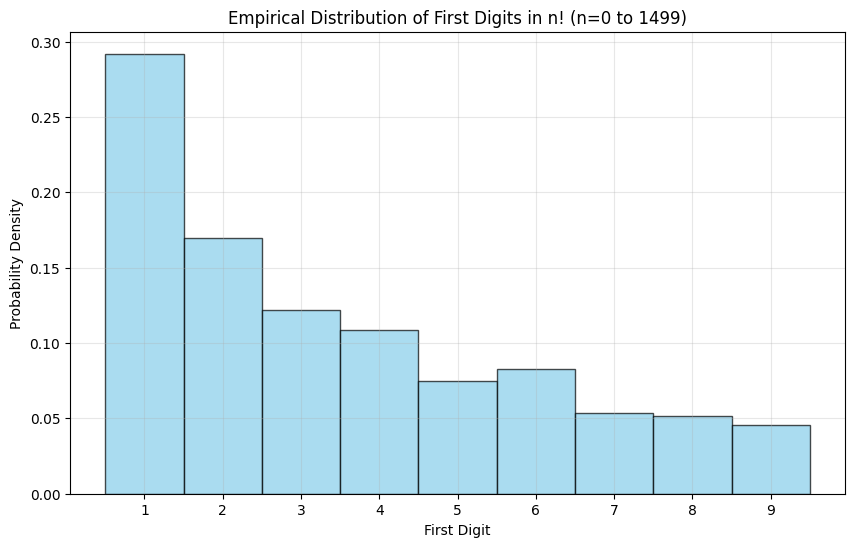

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

n = 1500
first_digits = []

for i in range(n):
    fact_val = factorial(i)
    first_digit = int(str(fact_val)[0])
    first_digits.append(first_digit)

plt.figure(figsize=(10, 6))
plt.hist(first_digits, bins=np.arange(0.5, 10.5, 1), density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Empirical Distribution of First Digits in n! (n=0 to 1499)')
plt.xlabel('First Digit')
plt.ylabel('Probability Density')
plt.xticks(range(1, 10))
plt.grid(True, alpha=0.3)
plt.show()

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

Chi-square statistic: 670.8000
Degrees of freedom: 8
p-value: 0.0000000000
Critical value (α=0.05): 15.5073


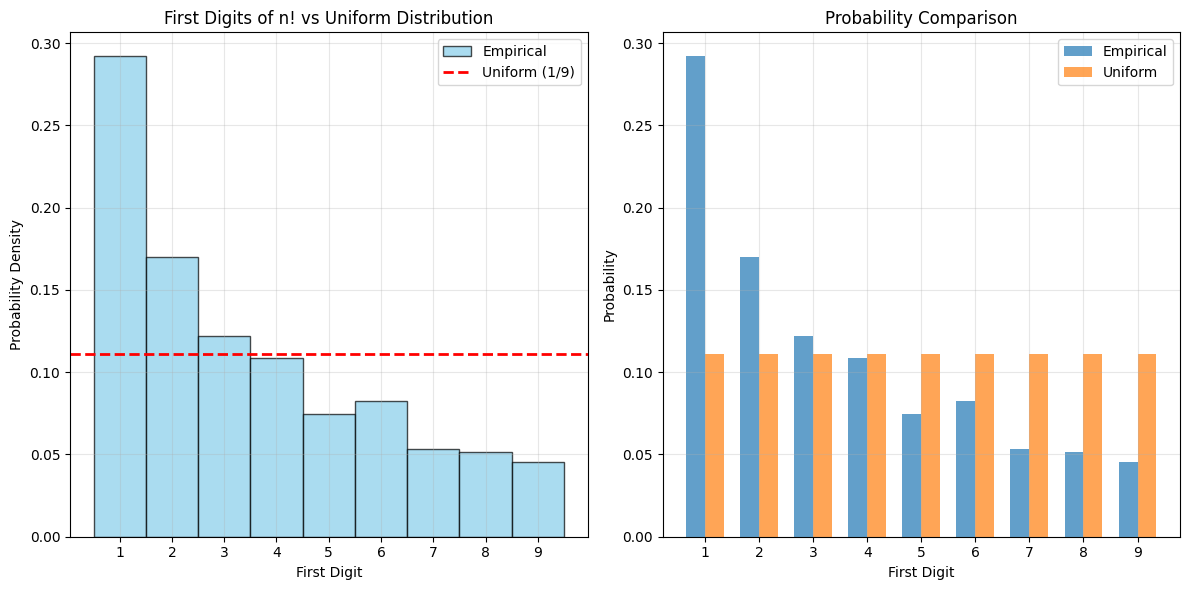


Conclusion: Reject null hypothesis - The data does NOT follow a uniform distribution


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy.stats import chi2

n = 1500
first_digits = []

for i in range(n):
    fact_val = factorial(i)
    first_digit = int(str(fact_val)[0])
    first_digits.append(first_digit)

# Calculate observed frequencies
observed = np.zeros(9)
for digit in first_digits:
    observed[digit-1] += 1

# Expected frequencies for uniform distribution
expected = np.ones(9) * (n / 9)

# Chi-square test statistic
chi_square = np.sum((observed - expected)**2 / expected)

# Degrees of freedom = 9 digits - 1 = 8
df = 8

# p-value
p_value = 1 - chi2.cdf(chi_square, df)

print(f"Chi-square statistic: {chi_square:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.10f}")
print(f"Critical value (α=0.05): {chi2.ppf(0.95, df):.4f}")

# Plot histogram with uniform distribution comparison
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(first_digits, bins=np.arange(0.5, 10.5, 1), density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Empirical')
plt.axhline(y=1/9, color='red', linestyle='--', linewidth=2, label='Uniform (1/9)')
plt.title('First Digits of n! vs Uniform Distribution')
plt.xlabel('First Digit')
plt.ylabel('Probability Density')
plt.xticks(range(1, 10))
plt.legend()
plt.grid(True, alpha=0.3)

# Bar chart comparison
plt.subplot(1, 2, 2)
digits = range(1, 10)
x_pos = np.arange(len(digits))
width = 0.35

plt.bar(x_pos - width/2, observed/n, width, label='Empirical', alpha=0.7)
plt.bar(x_pos + width/2, [1/9]*9, width, label='Uniform', alpha=0.7)
plt.title('Probability Comparison')
plt.xlabel('First Digit')
plt.ylabel('Probability')
plt.xticks(x_pos, digits)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation
if p_value < 0.05:
    print("\nConclusion: Reject null hypothesis - The data does NOT follow a uniform distribution")
else:
    print("\nConclusion: Fail to reject null hypothesis - The data may follow a uniform distribution")

<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

Chi-square statistic: 9.4566
Degrees of freedom: 8
p-value: 0.3052548340
Critical value (α=0.05): 15.5073

Benford's Law probabilities:
Digit 1: 0.3010
Digit 2: 0.1761
Digit 3: 0.1249
Digit 4: 0.0969
Digit 5: 0.0792
Digit 6: 0.0669
Digit 7: 0.0580
Digit 8: 0.0512
Digit 9: 0.0458


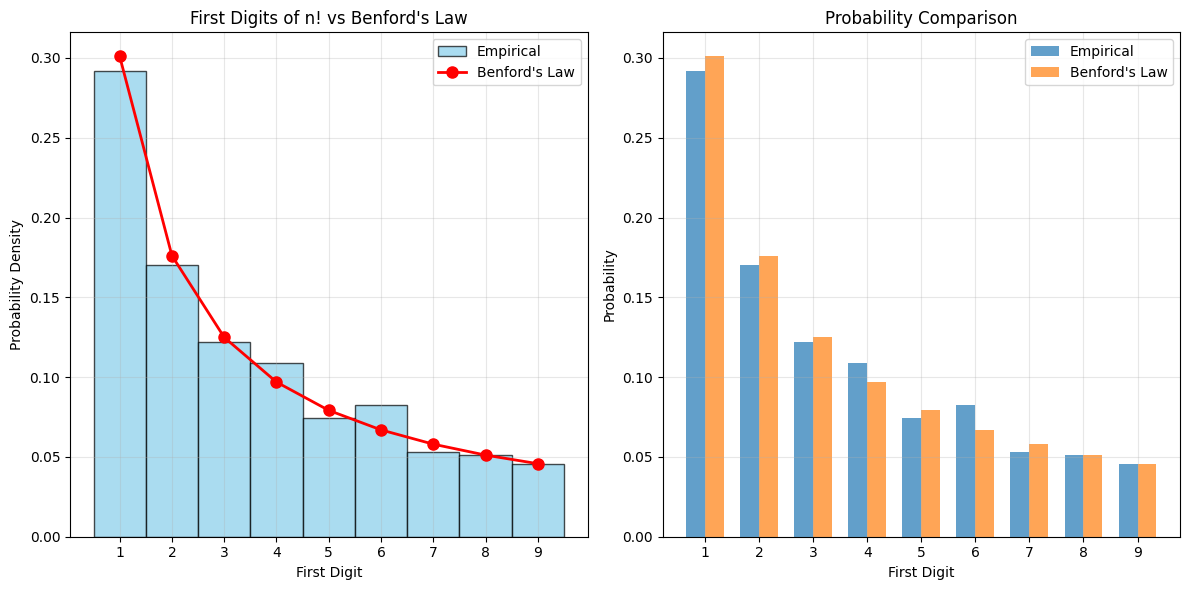


Conclusion: Fail to reject null hypothesis - The data follows Benford's Law


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy.stats import chi2

n = 1500
first_digits = []

for i in range(n):
    fact_val = factorial(i)
    first_digit = int(str(fact_val)[0])
    first_digits.append(first_digit)

# Calculate observed frequencies
observed = np.zeros(9)
for digit in first_digits:
    observed[digit-1] += 1

# Benford's Law probabilities
benford_probs = np.array([np.log10(1 + 1/d) for d in range(1, 10)])
expected = benford_probs * n

# Chi-square test statistic
chi_square = np.sum((observed - expected)**2 / expected)

# Degrees of freedom = 9 digits - 1 = 8
df = 8

# p-value
p_value = 1 - chi2.cdf(chi_square, df)

print(f"Chi-square statistic: {chi_square:.4f}")
print(f"Degrees of freedom: {df}")
print(f"p-value: {p_value:.10f}")
print(f"Critical value (α=0.05): {chi2.ppf(0.95, df):.4f}")

# Print Benford's Law probabilities
print("\nBenford's Law probabilities:")
for d, prob in zip(range(1, 10), benford_probs):
    print(f"Digit {d}: {prob:.4f}")

# Plot histogram with Benford's Law comparison
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(first_digits, bins=np.arange(0.5, 10.5, 1), density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Empirical')
x_pos = np.arange(1, 10)
plt.plot(x_pos, benford_probs, 'ro-', linewidth=2, markersize=8, label="Benford's Law")
plt.title('First Digits of n! vs Benford\'s Law')
plt.xlabel('First Digit')
plt.ylabel('Probability Density')
plt.xticks(range(1, 10))
plt.legend()
plt.grid(True, alpha=0.3)

# Bar chart comparison
plt.subplot(1, 2, 2)
digits = range(1, 10)
x_pos = np.arange(len(digits))
width = 0.35

plt.bar(x_pos - width/2, observed/n, width, label='Empirical', alpha=0.7)
plt.bar(x_pos + width/2, benford_probs, width, label="Benford's Law", alpha=0.7)
plt.title('Probability Comparison')
plt.xlabel('First Digit')
plt.ylabel('Probability')
plt.xticks(x_pos, digits)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation
if p_value < 0.05:
    print("\nConclusion: Reject null hypothesis - The data does NOT follow Benford's Law")
else:
    print("\nConclusion: Fail to reject null hypothesis - The data follows Benford's Law")

<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/us_pop.csv')

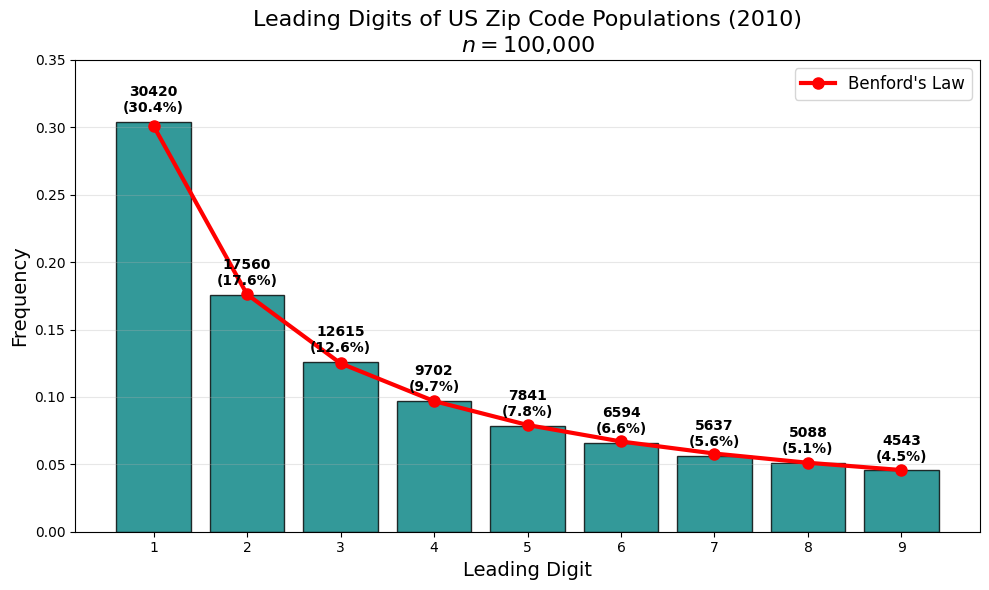

In [ ]:
pop = df['population']                   # change column name if different

# 2. Extract leading digit
def leading_digit(x):
    if x <= 0: return np.nan
    return int(str(x)[0])

df['lead'] = pop.apply(leading_digit)
df = df.dropna(subset=['lead'])
df['lead'] = df['lead'].astype(int)

# 3. Histogram
observed, _ = np.histogram(df['lead'], bins=range(1,11))
n = len(df)
proportions = observed / n

# 4. Benford
digits = np.arange(1,10)
benford = np.log10(1 + 1/digits)

# 5. Plot
plt.figure(figsize=(10,6))
bars = plt.bar(digits, proportions, color='teal', edgecolor='black', alpha=0.8)

# Overlay Benford
plt.plot(digits, benford, 'red', marker='o', linewidth=3, markersize=8, label="Benford's Law")

# Labels
plt.title('Leading Digits of US Zip Code Populations (2010)\n$n = 100{,}000$', fontsize=16)
plt.xlabel('Leading Digit', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(digits)
plt.ylim(0, 0.35)
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=12)

# Print numbers on bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{observed[i]}\n({proportions[i]:.1%})',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# -------------------------------------------------
# 1. Load the data
# -------------------------------------------------
      # must be in the same folder
pop = df['population'].astype(int)      # column name may differ – adjust if needed

# -------------------------------------------------
# 2. Extract leading digit
# -------------------------------------------------
def leading_digit(x):
    # works for positive integers; 0 is ignored (no leading digit)
    if x <= 0:
        return np.nan
    s = str(x)
    return int(s[0])

lead = pop.apply(leading_digit).dropna().astype(int)

# -------------------------------------------------
# 3. Observed frequencies
# -------------------------------------------------
observed, _ = np.histogram(lead, bins=np.arange(0.5, 10.5, 1))  # digits 1-9
n = observed.sum()                                            # total valid numbers

print("Total numbers with a leading digit :", n)
print("Observed counts :", observed)

# -------------------------------------------------
# 4. Expected counts
# -------------------------------------------------
# 4a Uniform
expected_uniform = np.full(9, n / 9)

# 4b Benford
benford_prob = np.log10(1 + 1/np.arange(1,10))
expected_benford = benford_prob * n

print("\nExpected (Uniform) :", expected_uniform.astype(int))
print("Expected (Benford):", expected_benford.round(2))

# -------------------------------------------------
# 5. Chi-square tests
# -------------------------------------------------
def chi2_test(obs, exp, name):
    chi2, p = stats.chisquare(f_obs=obs, f_exp=exp)
    df = len(obs) - 1
    print(f"\n=== {name} ===")
    print(f"χ² = {chi2:.3f},  df = {df},  p-value = {p:.3e}")
    if p < 1e-10:
        print("→ REJECT the hypothesis (extremely strong evidence against it)")
    elif p < 0.05:
        print("→ REJECT at 5% level")
    else:
        print("→ FAIL TO REJECT")

chi2_test(observed, expected_uniform, "Uniform distribution")
chi2_test(observed, expected_benford, "Benford's law")

Total numbers with a leading digit : 100000
Observed counts : [30420 17560 12615  9702  7841  6594  5637  5088  4543]

Expected (Uniform) : [11111 11111 11111 11111 11111 11111 11111 11111 11111]
Expected (Benford): [30103.   17609.13 12493.87  9691.    7918.12  6694.68  5799.19  5115.25
  4575.75]

=== Uniform distribution ===
χ² = 50323.536,  df = 8,  p-value = 0.000e+00
→ REJECT the hypothesis (extremely strong evidence against it)

=== Benford's law ===
χ² = 11.843,  df = 8,  p-value = 1.583e-01
→ FAIL TO REJECT


**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

AI was used to inform this analysis:

Claude (Anthropic). (2025, November 4). Red-tailed hawks population estimation and birthday paradox analysis [Large language model interaction]. Anthropic. https://claude.ai

## OpenAI. (2025, November 4). Discussion on modeling and analyzing birthday data — Chi-square, KS test, and Q–Q plots. ChatGPT (GPT-5) conversation with Darcy. Retrieved from https://chat.openai.com/